In [11]:
# Importing the necessary librairies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras

In [12]:
# Initializing the model over here
base_model=MobileNet(weights='imagenet',include_top=False)

In [13]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)

In [14]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [15]:
# Image preprocessing will be here 
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
# Providing the path for our training data
train_generator=train_datagen.flow_from_directory(r'dataset\training_set',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='sparse',
                                                 shuffle=True)


Found 156 images belonging to 2 classes.


In [17]:
# Providing the path for our test data
test_set = train_datagen.flow_from_directory(r'dataset\test_set',
                                            target_size=(224,224),
                                            batch_size=10,
                                            class_mode='sparse')

Found 39 images belonging to 2 classes.


In [18]:
# we are compiling our modelover here
model.compile(optimizer='Adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [19]:
step_size_train=train_generator.n//train_generator.batch_size

In [20]:
# We are training our model over here
history=model.fit_generator(generator=train_generator,
                            steps_per_epoch=step_size_train,
                            epochs=30,
                            verbose=1,
                            validation_data=test_set)

C:\Program Files\Python36\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
15/15 [==============================] - 10s 554ms/step - loss: 0.9923 - accuracy: 0.7603 - val_loss: 1.5876 - val_accuracy: 0.6410
Epoch 2/30
15/15 [==============================] - 7s 495ms/step - loss: 0.1927 - accuracy: 0.9247 - val_loss: 7.2058 - val_accuracy: 0.5128
Epoch 3/30
15/15 [==============================] - 7s 498ms/step - loss: 0.4383 - accuracy: 0.8562 - val_loss: 4.6790 - val_accuracy: 0.4872
Epoch 4/30
15/15 [==============================] - 8s 507ms/step - loss: 0.1396 - accuracy: 0.9452 - val_loss: 11.1826 - val_accuracy: 0.4872
Epoch 5/30
15/15 [==============================] - 8s 506ms/step - loss: 0.1686 - accuracy: 0.9521 - val_loss: 1.0583 - val_accuracy: 0.7949
Epoch 6/30
15/15 [==============================] - 7s 495ms/step - loss: 0.2197 - accuracy: 0.9178 - val_loss: 0.9088 - val_accuracy: 0.9231
Epoch 7/30
15/15 [==============================] - 7s 489ms/step - loss: 0.0607 - accuracy: 0.9863 - val_loss: 0.4791 - val_accuracy: 0.8718
Epoc

In [21]:
model.save('mobilenet.h5') # Here the trained model is getting saved as Mobilenet.h5 file

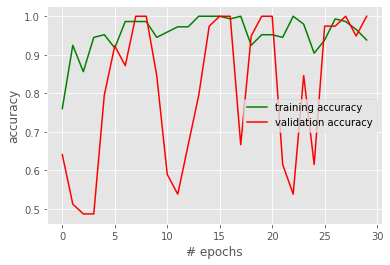

In [22]:
# Code to plot the accuracy graph
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(r'mobilenet_acc.png')
plt.show()

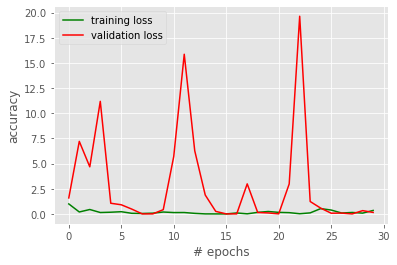

In [23]:
# Code to plot the loss graph
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(r'mobilenet_loss.png')
plt.show()

In [24]:
# Let's Print the accuracy of our moel
acc=history.history['accuracy'][-1]
print(acc)

0.9383561611175537


In [25]:
# This will print each and individual category inside our training data
import os
data_dir=r"dataset\training_set/"

spinal=[]
for file in os.listdir(data_dir):
    spinal+=[file]
print(spinal)
print(len(spinal))

['c', 's']
2


[0.33708125 0.66291875]


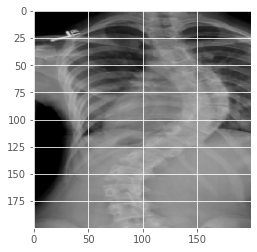

Prediction: s


In [26]:
# prediction section
import numpy as np
from skimage import io
from keras.preprocessing import image

img = image.load_img(r'dataset\training_set\s\s.8 - Copy (2).png', grayscale=False, target_size=(128,128,3))
show_img=image.load_img(r'dataset\training_set\s\s.8 - Copy (2).png', grayscale=False, target_size=(200, 200,3))
spinal = spinal
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',spinal[ind])